
## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=True, index_col=0)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics for numeric columns
summary_stats = df.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
# Count missing (NaN) values
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values


Comments         525600
GHI                   0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [5]:
# Calculate percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

missing_report


,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


In [6]:
# Columns with more than 5% missing data
high_missing = missing_report[missing_report['missing_percent'] > 5]
high_missing

,missing_count,missing_percent
Comments,525600,100.0


## Cleaning & Outlier Handling Steps

In [7]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [8]:
# Compute Z-scores and convert to a DataFrame (important!)
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))

# Wrap the z-scores in a DataFrame with same index and columns as df
z_df = pd.DataFrame(z_scores, columns=key_cols, index=df.index)

# Create a boolean mask for outliers
outliers = z_df > 3


In [9]:
# Replace outliers with the median of each column
for col in key_cols:
    median_val = df[col].median()
    df.loc[outliers[col], col] = median_val

In [10]:
print("Outliers replaced per column:")
print(outliers.sum())


Outliers replaced per column:
GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


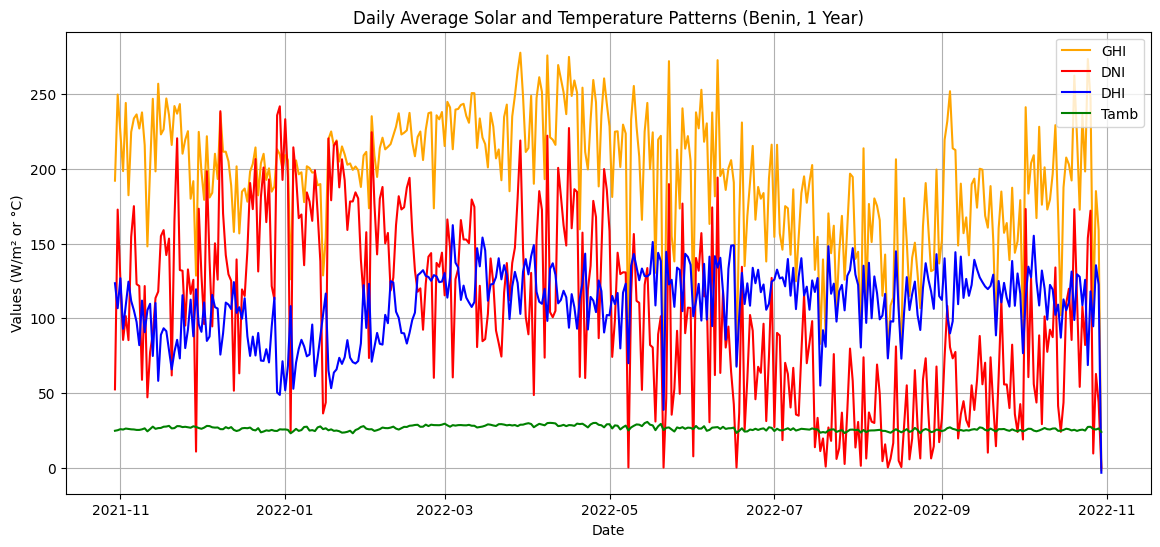

In [11]:
# Resample daily mean values
df_daily = df.resample('D').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI', color='blue')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb', color='green')

plt.title('Daily Average Solar and Temperature Patterns (Benin, 1 Year)')
plt.xlabel('Date')
plt.ylabel('Values (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3344\1616337682.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


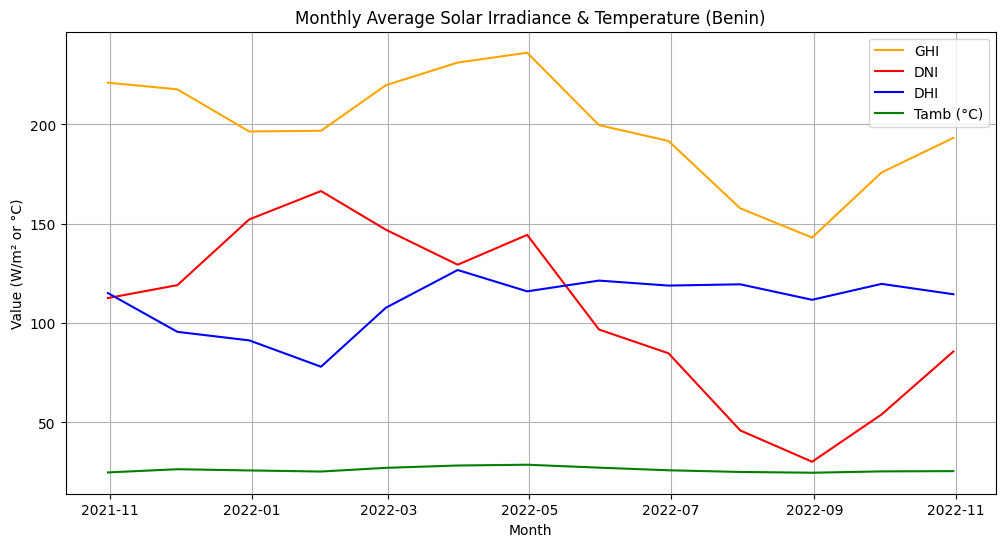

In [12]:
import matplotlib.pyplot as plt

# Compute monthly averages
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI', color='orange')
plt.plot(df_monthly.index, df_monthly['DNI'], label='DNI', color='red')
plt.plot(df_monthly.index, df_monthly['DHI'], label='DHI', color='blue')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Monthly Average Solar Irradiance & Temperature (Benin)')
plt.xlabel('Month')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


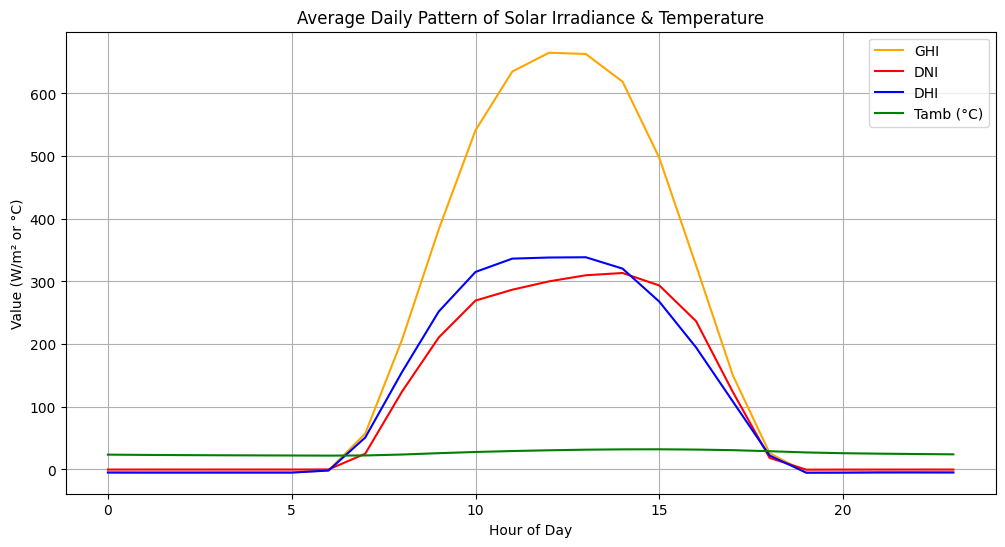

In [13]:
# Extract hour of day
df['hour'] = df.index.hour

# Group by hour and compute mean
df_hourly = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', color='orange')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI', color='red')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI', color='blue')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Average Daily Pattern of Solar Irradiance & Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


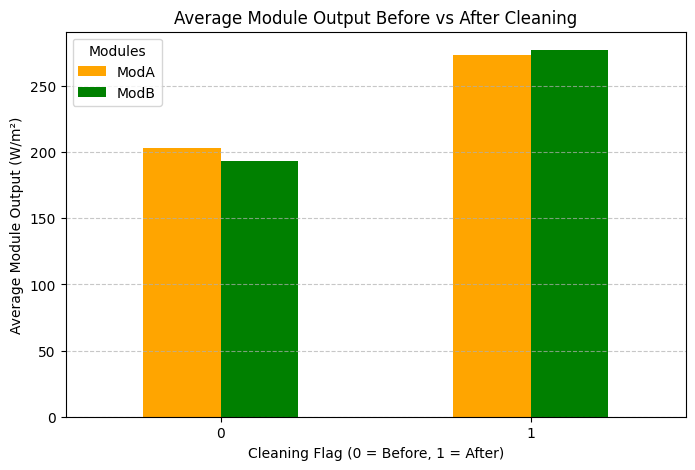

In [14]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_impact.plot(
    kind='bar',
    figsize=(8,5),
    color=['orange', 'green']
)

plt.title('Average Module Output Before vs After Cleaning')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Module Output (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modules')
plt.show()





## Correlation & Relationship Analysis

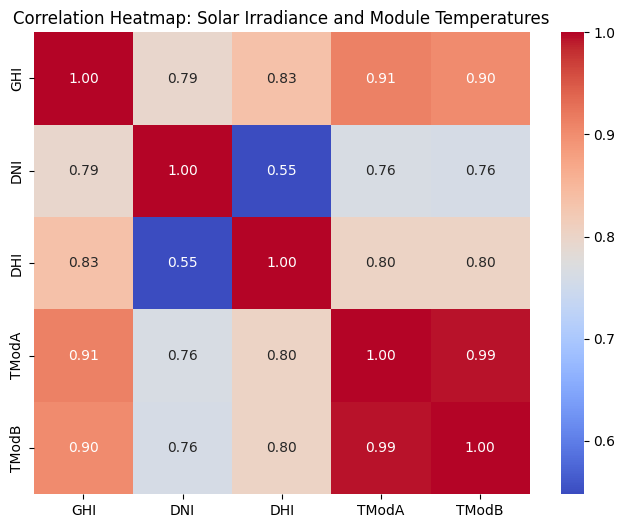

In [15]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance and Module Temperatures")
plt.show()

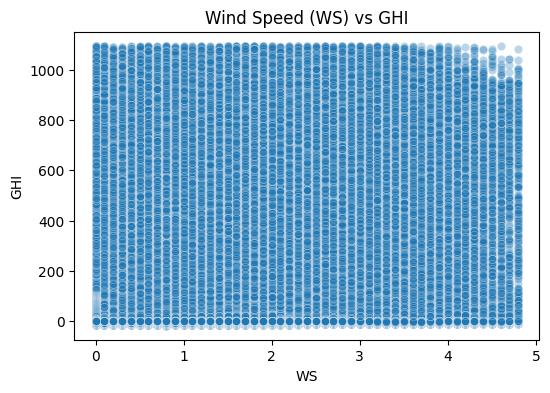

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed (WS) vs GHI')
plt.show()


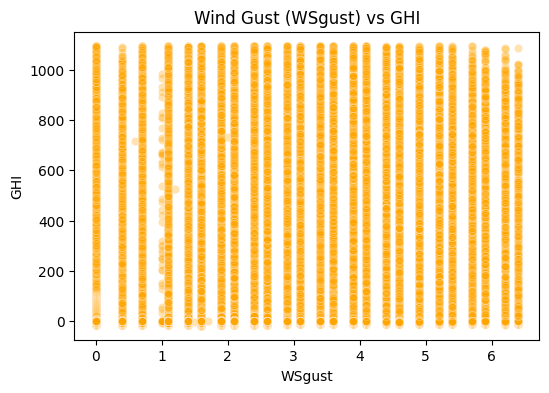

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.3, color='orange')
plt.title('Wind Gust (WSgust) vs GHI')
plt.show()


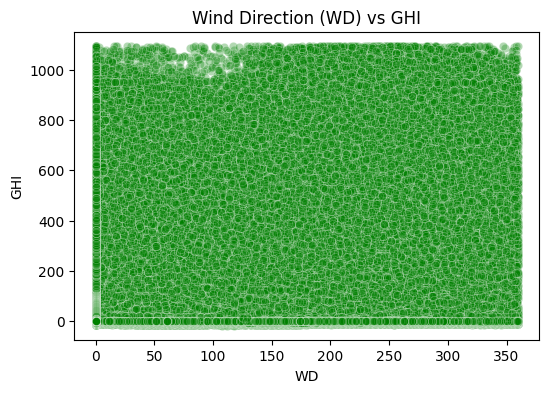

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.3, color='green')
plt.title('Wind Direction (WD) vs GHI')
plt.show()


## Wind & Distribution Analysis

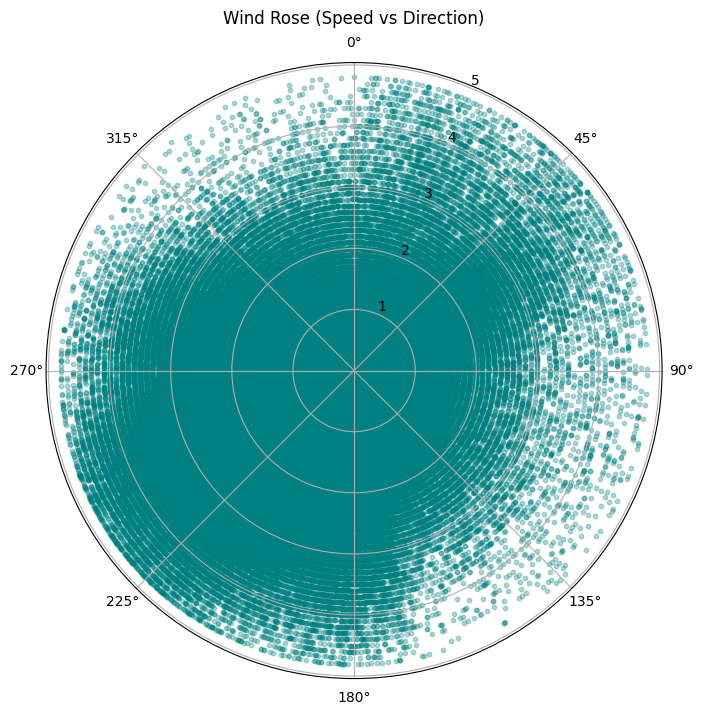

In [19]:
# Drop missing values
wind_df = df[['WD', 'WS']].dropna()

# Convert to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_df['WD'])

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')   # 0° at North
ax.set_theta_direction(-1)        # Clockwise

# Plot wind speed vs direction
ax.scatter(wind_dir_rad, wind_df['WS'], alpha=0.3, s=10, color='teal')

ax.set_title("Wind Rose (Speed vs Direction)", va='bottom')
plt.show()

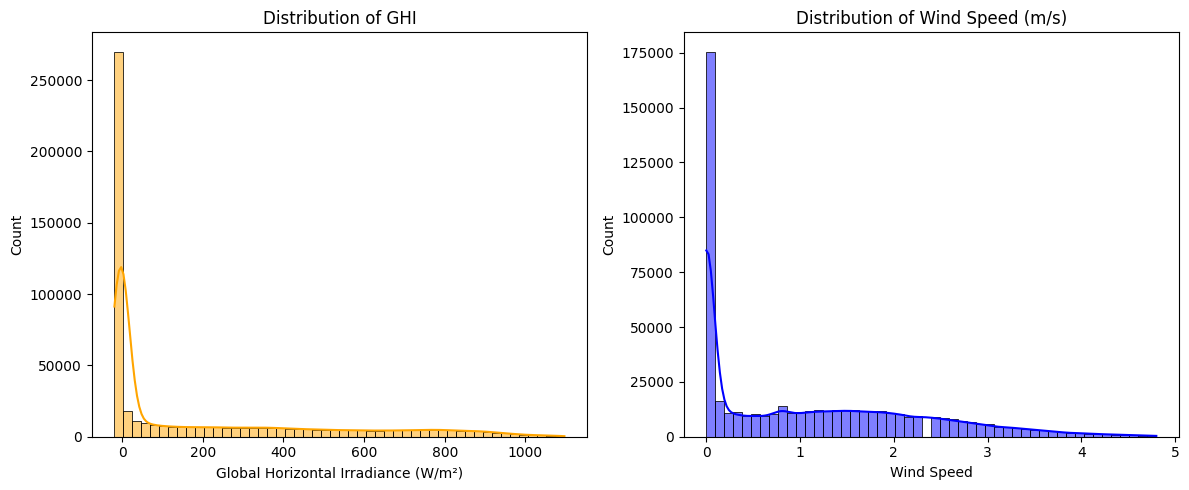

In [20]:
#
plt.figure(figsize=(12,5))

# Histogram for GHI
plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of GHI')
plt.xlabel('Global Horizontal Irradiance (W/m²)')

# Histogram for WS
plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=50, kde=True, color='blue')
plt.title('Distribution of Wind Speed (m/s)')
plt.xlabel('Wind Speed')

plt.tight_layout()
plt.show()

## Correlation between RH, Tamb, and GHI

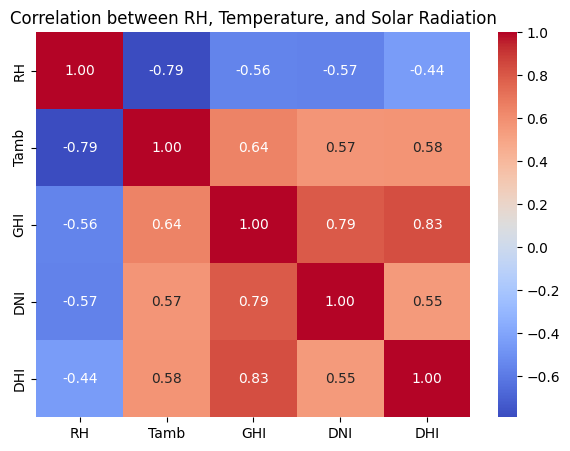

In [21]:
# Select key columns
temp_corr = df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()

# Plot correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between RH, Temperature, and Solar Radiation')
plt.show()

### Scatter Plots — Relationship Patterns

Let’s visualize those relationships more directly.

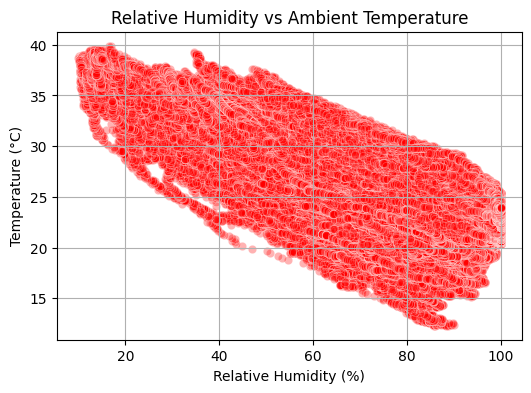

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, color='red')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


### RH vs Solar Irradiance (GHI)

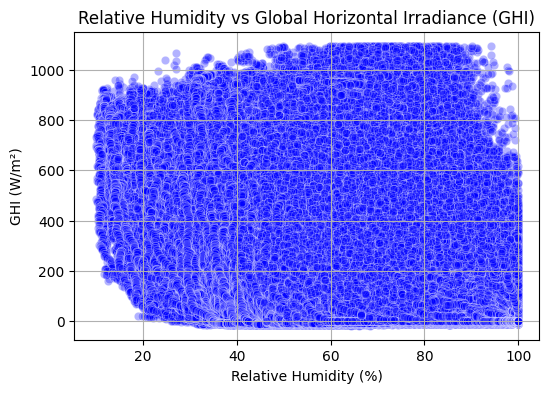

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, color='blue')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


## Basic Bubble Chart — RH as Bubble Size

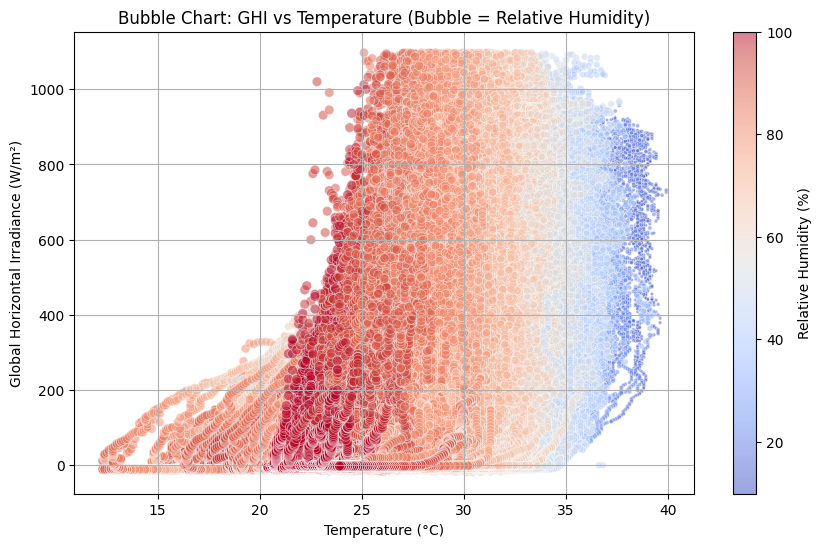

In [24]:
plt.figure(figsize=(10,6))

# Scale bubble sizes for better visibility (divide by constant)
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=df['RH'] / 2,     # bubble size (scaled)
    c=df['RH'],         # color by humidity
    cmap='coolwarm', 
    alpha=0.5, 
    edgecolors='w', 
    linewidth=0.5
)

plt.title("Bubble Chart: GHI vs Temperature (Bubble = Relative Humidity)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()